## Market Segmentation

### Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

### Load the data

In [2]:
df=pd.read_csv('datasets/Example.csv')

In [3]:
df.sample(5)

,Satisfaction,Loyalty
2,5,-0.99
23,3,-0.96
24,6,1.03
8,8,1.02
5,1,-1.66


### Plot the data

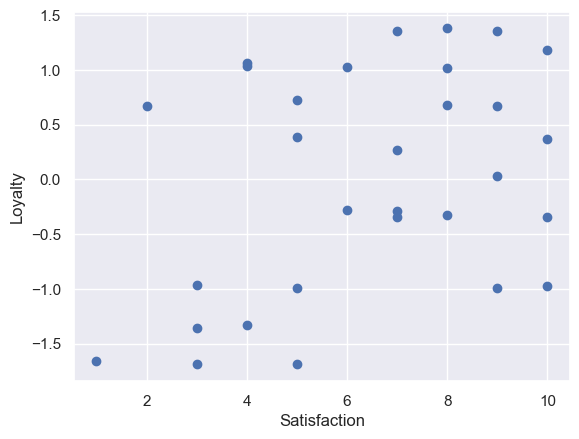

In [4]:
plt.scatter(df['Satisfaction'],df['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

### Select the Features

In [5]:
x=df.copy()

In [6]:
kmeans=KMeans(2)
kmeans.fit(x)

c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

### Clustering results

In [8]:
clusters=x.copy()
clusters['cluster_pred']=kmeans.predict(x)

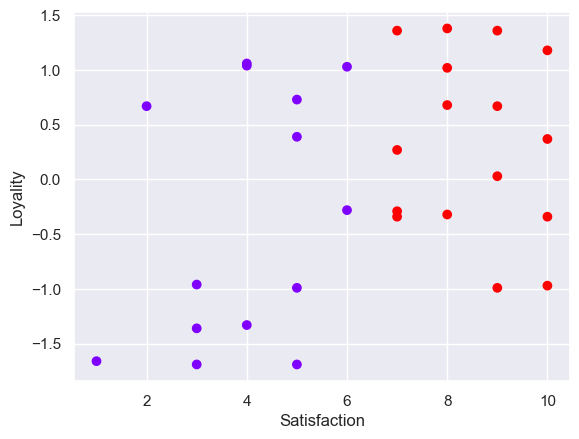

In [9]:
plt.scatter(clusters['Satisfaction'],clusters['Loyalty'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyality')
plt.show()

### Standardize the variables

In [11]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(x)
x_scaled[0:7]

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172]])

### Take advantage of Elbow Method

In [14]:
wcss=[]

for i in range(1,10):
    kmeans=KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)
wcss

c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMe

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.24718180592842,
 7.792695153937187,
 6.54983679159933,
 5.363006425346783,
 4.495893267776023,
 3.7311853924557177]

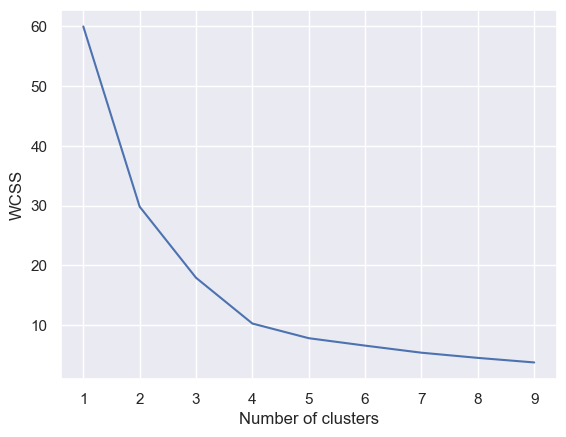

In [15]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Explore Solutions

In [32]:
km_new=KMeans(4)
km_new.fit(x_scaled)
clusters_new=x.copy()
clusters_new['cluster_pred']=km_new.predict(x_scaled)

c:\Users\Ghost\anaconda3\envs\class\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [33]:
clusters_new.sample(5)

,Satisfaction,Loyalty,cluster_pred
13,2,0.67,2
15,9,1.36,0
9,8,0.68,0
26,10,0.37,0
7,8,-0.32,3


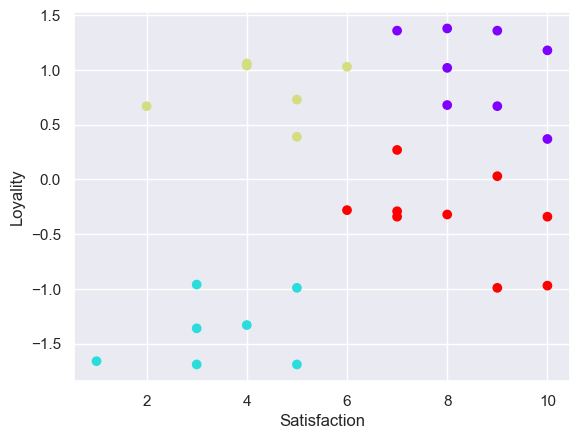

In [34]:
plt.scatter(clusters_new['Satisfaction'],clusters_new['Loyalty'],c=clusters_new['cluster_pred'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyality')
plt.show()